# Kartik Gupta
##START TECH ACADEMY
###TASK 2
###QUESTION :
My task is to help John from STA IT services to create a linear regression model in Python or R to predict the CTC/Salary of new hires from the data provided.

###Import required libraries 

In [58]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sea

###Exploring and Preprocessing the Data

In [59]:
dataset = pd.read_excel('Data_file.xlsx', header = 2,index_col=0)
dataset

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729
...,...,...,...,...,...,...,...,...
1334,Tier 3,Executive,Metro,59661,4,68,50,69712.403655
1335,Tier 1,Executive,Non-Metro,53714,1,67,18,69298.750099
1336,Tier 2,Executive,Non-Metro,61957,1,47,18,66397.770686


In [60]:
dataset.head()  

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
S.No.,,,,,,,,
1,Tier 1,Manager,Non-Metro,55523,3,66,19,71406.576531
2,Tier 2,Executive,Metro,57081,1,84,18,68005.870631
3,Tier 2,Executive,Metro,60347,2,52,28,76764.020277
4,Tier 3,Executive,Metro,49010,2,81,33,82092.386880
5,Tier 3,Executive,Metro,57879,4,74,32,73878.097729


In [61]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 1 to 1338
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   College               1338 non-null   object 
 1   Role                  1338 non-null   object 
 2   City type             1338 non-null   object 
 3   Previous CTC          1338 non-null   int64  
 4   Previous job changes  1338 non-null   int64  
 5   Graduation marks      1338 non-null   int64  
 6   Exp (Months)          1338 non-null   int64  
 7   CTC                   1338 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 94.1+ KB


In [62]:
dataset.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.338993
std,6685.600553,1.123502,14.894696,14.049960,12551.280263
min,36990.000000,1.000000,35.000000,18.000000,53020.319026
25%,50547.000000,2.000000,47.000000,27.000000,66905.070033
50%,55293.500000,3.000000,60.000000,39.000000,73112.640487
75%,60150.500000,4.000000,73.000000,51.000000,80747.178420
max,77911.000000,4.000000,85.000000,64.000000,123416.994271


In [63]:
dataset.isnull().sum()

College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

###Loading and Preprocessing the test data 


In [64]:
test = pd.read_excel('Test_data_file.xlsx')
test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,...,NaN,32438.761916,4659.731658,-832.274662,19359.943901,4080.577268,0.451593,-29.041071,-3.65235,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
test.columns

Index(['College', 'Role', 'City type', 'College_T1', 'College_T2',
       'Role_Manager', 'City_Metro', 'previous CTC', 'previous job changes',
       'Graduation marks', 'Exp', 'Actual CTC', 'Predicted CTC', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23'],
      dtype='object')

In [66]:
test.drop(test.columns[14:23], axis=1, inplace=True)
test.head()


,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC,Unnamed: 13,Unnamed: 23
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN,NaN,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN,NaN,258.940639
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN,NaN,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,NaN,NaN,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,NaN,NaN,NaN


In [67]:
del test['Unnamed: 13']
del test['Unnamed: 23']

In [68]:
test.head()

,College,Role,City type,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,Tier 1,Manager,Non-Metro,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,Tier 2,Executive,Metro,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,Tier 2,Executive,Metro,0,1,0,1,60347,2,52,28,76764.020277,NaN
3,Tier 3,Executive,Metro,0,0,0,1,49010,2,81,33,82092.386880,NaN
4,Tier 3,Executive,Metro,0,0,0,1,57879,4,74,32,73878.097729,NaN


In [69]:
del test['Role']
del test['College']
del test['City type']

In [70]:
test.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.576531,NaN
1,0,1,0,1,57081,1,84,18,68005.870631,NaN
2,0,1,0,1,60347,2,52,28,76764.020277,NaN
3,0,0,0,1,49010,2,81,33,82092.386880,NaN
4,0,0,0,1,57879,4,74,32,73878.097729,NaN


###Building a Linear Regression model 

In [71]:
X = test[['previous CTC','previous job changes','Graduation marks','Exp','College_T1','College_T2','Role_Manager','City_Metro']]
Y = test[['Actual CTC']]

In [72]:
X

,previous CTC,previous job changes,Graduation marks,Exp,College_T1,College_T2,Role_Manager,City_Metro
0,55523,3,66,19,1,0,1,0
1,57081,1,84,18,0,1,0,1
2,60347,2,52,28,0,1,0,1
3,49010,2,81,33,0,0,0,1
4,57879,4,74,32,0,0,0,1
...,...,...,...,...,...,...,...,...
1333,59661,4,68,50,0,0,0,1
1334,53714,1,67,18,1,0,0,0
1335,61957,1,47,18,0,1,0,0
1336,53203,3,69,21,1,0,0,0


In [73]:
Y

,Actual CTC
0,71406.576531
1,68005.870631
2,76764.020277
3,82092.386880
4,73878.097729
...,...
1333,69712.403655
1334,69298.750099
1335,66397.770686
1336,64044.382949


In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.3,random_state = 101)

In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression()

###Prediction of CTC

In [82]:
prediction = lm.predict(X)
test['Predicted CTC'] = prediction
test.head()

,College_T1,College_T2,Role_Manager,City_Metro,previous CTC,previous job changes,Graduation marks,Exp,Actual CTC,Predicted CTC
0,1,0,1,0,55523,3,66,19,71406.576531,85479.353477
1,0,1,0,1,57081,1,84,18,68005.870631,66555.819929
2,0,1,0,1,60347,2,52,28,76764.020277,70643.819779
3,0,0,0,1,49010,2,81,33,82092.386880,67203.839421
4,0,0,0,1,57879,4,74,32,73878.097729,70681.598118


In [83]:
prediction 

array([[85479.35347671],
       [66555.81992913],
       [70643.81977927],
       ...,
       [65110.95620789],
       [65772.64048578],
       [91010.38463203]])

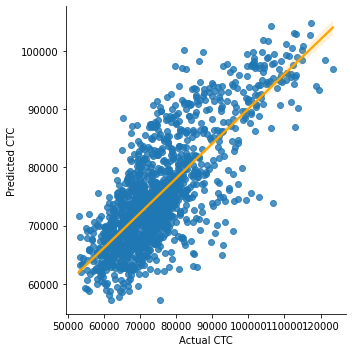

In [79]:
sea.lmplot(x = 'Actual CTC', y = 'Predicted CTC', data = test, line_kws = {'color': 'Orange'})